In [9]:
# help from https://github.com/WillKoehrsen/Data-Analysis/blob/master/bayesian_lr/Bayesian%20Linear%20Regression%20Project.ipynb
import pandas as pd
# PyMC3 for Bayesian Inference
import pymc3 as pm
import numpy as np
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving supermarket_sales.csv to supermarket_sales.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['supermarket_sales.csv']))
# Dataset is now stored in a Pandas Dataframe

In [5]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
data.Rating.value_counts()

6.0     26
6.6     24
9.5     22
4.2     22
8.0     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: Rating, Length: 61, dtype: int64

In [7]:
# getting only small number of columns
data_minimal = data[['Unit price', 'Quantity', "Tax 5%", "Total", "cogs", "gross margin percentage", "gross income", "Rating"]]
# data_label = data[["Rating"]]
col_names = data_minimal.columns
col_names = [col.replace(" ", "_") for col in col_names]
col_names = [col.replace("%", "") for col in col_names]

data_minimal.columns = col_names

In [13]:
for i in data_minimal.columns:
  data_mean = np.mean(data_minimal[i])
  data_std = np.std(data_minimal[i])
  data_minimal[i] = (data_minimal[i] - data_mean) / data_std



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
from sklearn.utils import shuffle
data_minimal = shuffle(data_minimal)
data_minimal.reset_index(inplace=True, drop=True)

In [15]:
# seperating test and train
data_minimal_train = data_minimal.iloc[:int(0.7*data_minimal.shape[0]),:]
data_minimal_test = data_minimal.iloc[int(0.7*data_minimal.shape[0]):,:]

In [16]:
data_minimal_train

,Unit_price,Quantity,Tax_5,Total,cogs,gross_margin_percentage,gross_income,Rating
0,-0.042374,1.536635,1.016463,1.016463,1.016463,-1.0,1.016463,0.074110
1,1.130148,0.509930,1.245892,1.245892,1.245892,-1.0,1.245892,-0.973790
2,0.174759,-0.516775,-0.283635,-0.283635,-0.283635,-1.0,-0.283635,-0.682707
3,-0.899958,-1.543480,-1.178109,-1.178109,-1.178109,-1.0,-1.178109,0.423410
4,0.632440,-0.859010,-0.385916,-0.385916,-0.385916,-1.0,-0.385916,0.714493
...,...,...,...,...,...,...,...,...
695,1.276666,1.536635,2.508819,2.508819,2.508819,-1.0,2.508819,1.529527
696,-1.412016,-1.543480,-1.236043,-1.236043,-1.236043,-1.0,-1.236043,0.772710
697,0.488187,1.536635,1.616738,1.616738,1.616738,-1.0,1.616738,1.238443
698,-0.568782,1.194400,0.247384,0.247384,0.247384,-1.0,0.247384,0.015893


In [17]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'Rating ~ ' + ' + '.join(['%s' % variable for variable in data_minimal_train.columns[:-1]])
formula

'Rating ~ Unit_price + Quantity + Tax_5 + Total + cogs + gross_margin_percentage + gross_income'

In [19]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    #step_3 = pm.DEMetropolisZ()
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = data_minimal_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if sys.path[0] == '':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, gross_income, gross_margin_percentage, cogs, Total, Tax_5, Quantity, Unit_price, Intercept]


Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 943 seconds.
The acceptance probability does not match the target. It is 0.8835111012376109, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 100 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [60]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    #step_3 = pm.DEMetropolisZ()
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = data_minimal_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if sys.path[0] == '':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, gross_income, gross_margin_percentage, cogs, Total, Tax_5, Quantity, Unit_price, Intercept]


Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 527 seconds.
There were 1171 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3419380123542763, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1171 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8884983886121781, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [20]:
pm.summary(normal_trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,49.509,276.147,-290.900,671.641,121.890,91.625,6.0,13.0,1.54
Unit_price,0.042,0.072,-0.094,0.183,0.005,0.004,187.0,297.0,1.01
Quantity,0.068,0.080,-0.083,0.220,0.006,0.004,177.0,333.0,1.01
Tax_5,-10.554,22.420,-50.514,24.176,8.033,5.908,9.0,12.0,1.17
Total,-7.511,44.121,-91.045,78.721,14.859,14.002,6.0,22.0,1.65
cogs,319.729,367.287,-41.916,937.068,239.132,195.972,2.0,12.0,2.32
gross_margin_percentage,49.535,276.146,-290.853,671.586,121.889,91.624,6.0,13.0,1.54
gross_income,-301.749,348.327,-880.773,50.204,223.832,182.591,3.0,14.0,1.98
sd,1.003,0.025,0.961,1.056,0.002,0.001,238.0,159.0,1.02


In [16]:

# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    #step = pm.DEMetropolisZ()
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = data_minimal_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace1 = pm.sample(draws=2000, chains = 1, tune = 1000)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if sys.path[0] == '':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sd, gross_income, gross_margin_percentage, cogs, Total, Tax_5, Quantity, Unit_price, Intercept]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 490 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [21]:
 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)


In [26]:
pm.summary(normal_trace)


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.286,0.726,-0.702,0.971,0.494,0.412,3.0,77.0,2.03
Unit_price,0.021,0.015,0.001,0.036,0.010,0.009,3.0,16.0,2.06
Quantity,0.449,0.379,0.014,0.826,0.266,0.226,3.0,21.0,2.07
Tax_5,0.413,1.049,-1.932,1.164,0.708,0.588,3.0,32.0,2.23
Total,-0.232,1.299,-2.635,0.874,0.861,0.711,2.0,11.0,2.65
cogs,0.280,1.428,-0.967,2.874,0.954,0.790,2.0,11.0,2.62
gross_margin_percentage,1.128,0.354,0.781,1.580,0.246,0.207,3.0,16.0,2.05
gross_income,-1.260,1.049,-3.080,-0.352,0.713,0.594,2.0,24.0,2.93
sd,1.930,0.207,1.670,2.135,0.144,0.122,3.0,13.0,2.02


In [53]:
import numpy as np
# Linear Formula from Bayesian Inference using Mean of Parameters
model_formula = 'Rating = '
for variable in normal_trace.varnames:
    model_formula += ' %0.2f * %s +' % (np.mean(normal_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])

'Rating =  0.51 * Intercept + -0.01 * Unit_price + -0.08 * Quantity + -0.32 * Tax_5 + -0.39 * Total + 0.41 * cogs + 1.48 * gross_margin_percentage + 0.47 * gross_income + 0.64 * sd_log__ + 1.90 * sd'

In [24]:
import arviz as az

In [55]:
normal_trace

<MultiTrace: 2 chains, 2000 iterations, 10 variables>

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


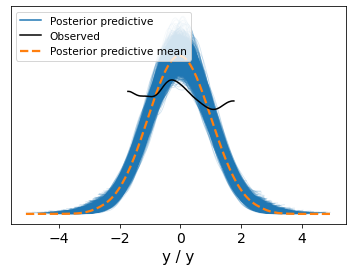

In [25]:
with normal_model:
    ppc = pm.sample_posterior_predictive(normal_trace)

az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=normal_model));

In [ ]:
plt.figure(figsize=(9, 7))
seaborn.jointplot(trace["age"], trace["educ"], kind="hex", color="#4CB391")
plt.xlabel("beta_age")
plt.ylabel("beta_educ");

In [57]:
normal_trace1

<MultiTrace: 1 chains, 2000 iterations, 10 variables>

Regression Results

In [21]:
trace = normal_trace
var_dict = {}
for variable in trace.varnames:
    var_dict[variable] = trace[variable]
    
# Results into a dataframe
var_weights = pd.DataFrame(var_dict)

# Means for all the weights
var_means = var_weights.mean(axis=0)

# Create an intercept column
data_minimal_test['Intercept'] = 1

# Align names of the test observations and means
names = list(var_means.index[:-2])
X_test = data_minimal_test.loc[:, names]
var_means = var_means[names]

# Calculate estimate for each test observation using the average weights
results = np.dot(np.array(var_means), X_test.values.T)

    
# Metrics 
actual = np.array(data_minimal_test["Rating"])
errors = results - actual
mae = np.mean(abs(errors))
rmse = np.sqrt(np.mean(errors ** 2))

print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))

Model  MAE: 0.8818
Model RMSE: 1.0134


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
